In [1]:
# Performed with some guidance from youtube
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("polynomialregression.csv")

In [3]:
dataset

,position,level,salary
0,business analyst,1,45000
1,junior consultant,2,50000
2,senior consultant,3,60000
3,manager,4,80000
4,country manager,5,110000
5,region manager,6,150000
6,partner,7,200000
7,senior partner,8,300000
8,c level,9,500000
9,CEO,10,1000000


In [4]:
x=dataset.iloc[:,1:2].values

In [5]:
y=dataset.iloc[:,2:].values

In [6]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

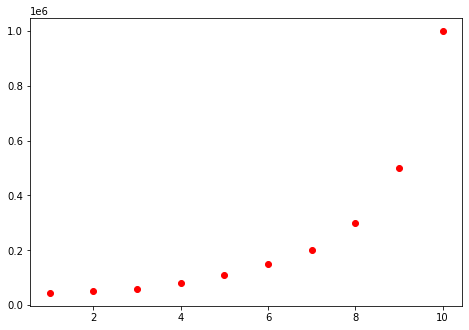

In [8]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y,color='r')

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [12]:
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)

In [11]:
pilreg=LinearRegression()
pilreg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

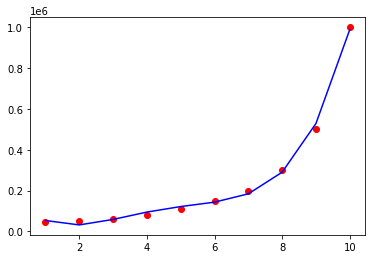

In [14]:
plt.scatter(x,y,color='red')
plt.plot(x,pilreg.predict(poly.fit_transform(x)),color='blue')

In [15]:
pilreg.predict(poly.fit_transform([[10]]))

array([[988916.08391613]])

In [16]:
pilreg.predict(poly.fit_transform([[2]]))

array([[31759.90675984]])

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dataset1=pd.read_csv("multilinearregression.csv")

In [19]:
dataset1.head()

,x1,x2,x3,x4,x5
0,8.0,78,284,9.1,109
1,9.3,68,433,8.7,144
2,7.5,70,739,7.2,113
3,8.9,96,1792,8.9,97
4,10.2,74,477,8.3,206


In [20]:
y=dataset1.iloc[:,:1].values
x=dataset1.iloc[:,1:].values

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
x_test

array([[ 70. , 739. ,   7.2, 113. ],
       [168. , 636. ,   9.1, 162. ]])

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regressor=LinearRegression()

In [26]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
pred=regressor.predict(x_test)

In [28]:
pred

array([[10.47838864],
       [13.81299929]])

In [29]:
y_test

array([[7.5],
       [8.8]])

In [30]:
regressor.coef_

array([[ 4.87395740e-02, -3.96428376e-04, -1.17341249e+00,
         1.52404900e-02]])

In [31]:
regressor.intercept_

array([14.0859736])

In [33]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

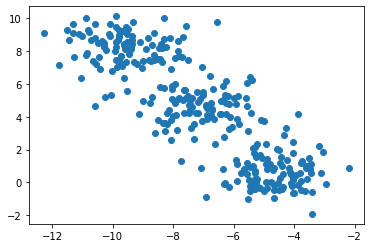

In [34]:
x,y=make_blobs(n_samples=300,cluster_std=1.00,random_state=12)
plt.scatter(x[:,0],x[:,1])
plt.show()

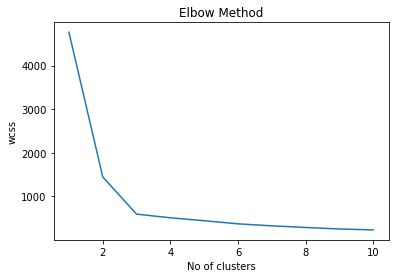

In [35]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.show()

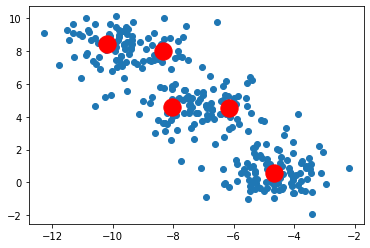

In [36]:
kmeans=KMeans(n_clusters=5)
pred_y=kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [38]:
iris=load_iris()
x=iris.data
y=iris.target
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=24)

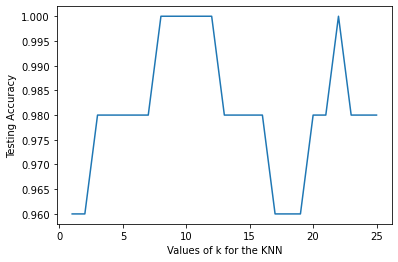

In [39]:
scores_list=[]
scores={}
krange=range(1,26)
for k in krange:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    scores[k]=metrics.accuracy_score(ytest,ypred)
    scores_list.append(metrics.accuracy_score(ytest,ypred))
    
plt.plot(krange,scores_list)
plt.xlabel("Values of k for the KNN")
plt.ylabel("Testing Accuracy")
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from sklearn.cluster import AgglomerativeClustering

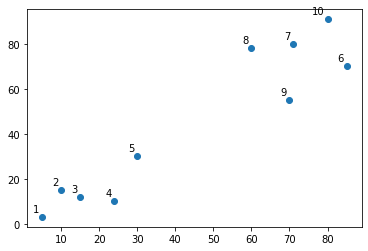

In [41]:
x=np.array([[5,3],
            [10,15],
            [15,12],
            [24,10],
            [30,30],
            [85,70],
            [71,80],
            [60,78],
            [70,55],
            [80,91],])

labels=range(1,11)
plt.scatter(x[:,0],x[:,1],label='True Position')
for label,x,y in zip(labels,x[:,0],x[:,1]):
    plt.annotate(label,xy=(x,y),xytext=(-3,3),textcoords='offset points',ha='right',va='bottom')
plt.show()                    

In [42]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [43]:
a

array([[ 1.38827849e+01,  4.43850083e+00],
       [ 1.16872556e+01,  1.25098137e+00],
       [ 1.03163967e+01,  1.44934627e+00],
       [ 9.83741213e+00, -2.04197417e+00],
       [ 8.69160067e+00, -4.28977303e+00],
       [ 9.82416420e+00,  1.44459041e+00],
       [ 9.21688905e+00,  9.60681718e-01],
       [ 1.01995087e+01, -2.48089865e+00],
       [ 1.28133902e+01, -1.25677560e+00],
       [ 1.38415115e+01,  4.20915408e+00],
       [ 1.25655687e+01, -8.20998424e-01],
       [ 6.55074161e+00, -2.17824976e+00],
       [ 1.03603694e+01, -5.63362637e-01],
       [ 1.04307903e+01,  1.55400680e-01],
       [ 1.10083125e+01,  1.41729996e+00],
       [ 1.11544662e+01,  9.00239759e-01],
       [ 8.44839444e+00, -2.96866713e-01],
       [ 9.57057439e+00, -2.11788583e+00],
       [ 1.23648141e+01, -1.75653468e+00],
       [ 1.28903591e+01, -1.18477066e+00],
       [ 9.13620561e+00, -1.97538292e+00],
       [ 8.71632766e+00, -2.07810133e+00],
       [ 1.09535405e+01,  2.00257747e+00],
       [ 1.

In [44]:
X = np.concatenate((a, b, c), axis=0)
print(X.shape)

(250, 2)


In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward', metric='euclidean')
Z.shape

(249, 4)

In [47]:
Z

array([[6.00000000e+00, 3.50000000e+01, 4.03105214e-02, 2.00000000e+00],
       [1.59000000e+02, 2.47000000e+02, 4.15336058e-02, 2.00000000e+00],
       [1.90000000e+02, 2.14000000e+02, 4.23431904e-02, 2.00000000e+00],
       [1.50000000e+01, 5.50000000e+01, 5.03965285e-02, 2.00000000e+00],
       [2.30000000e+01, 9.70000000e+01, 5.98615830e-02, 2.00000000e+00],
       [1.83000000e+02, 2.30000000e+02, 7.14307127e-02, 2.00000000e+00],
       [1.60000000e+02, 1.84000000e+02, 8.10640748e-02, 2.00000000e+00],
       [5.20000000e+01, 9.80000000e+01, 8.63310058e-02, 2.00000000e+00],
       [1.75000000e+02, 2.33000000e+02, 9.07935743e-02, 2.00000000e+00],
       [8.00000000e+00, 1.90000000e+01, 1.05398862e-01, 2.00000000e+00],
       [6.60000000e+01, 7.30000000e+01, 1.08977001e-01, 2.00000000e+00],
       [5.90000000e+01, 9.60000000e+01, 1.15828291e-01, 2.00000000e+00],
       [9.20000000e+01, 2.53000000e+02, 1.34937651e-01, 3.00000000e+00],
       [2.10000000e+02, 2.31000000e+02, 1.37055098e

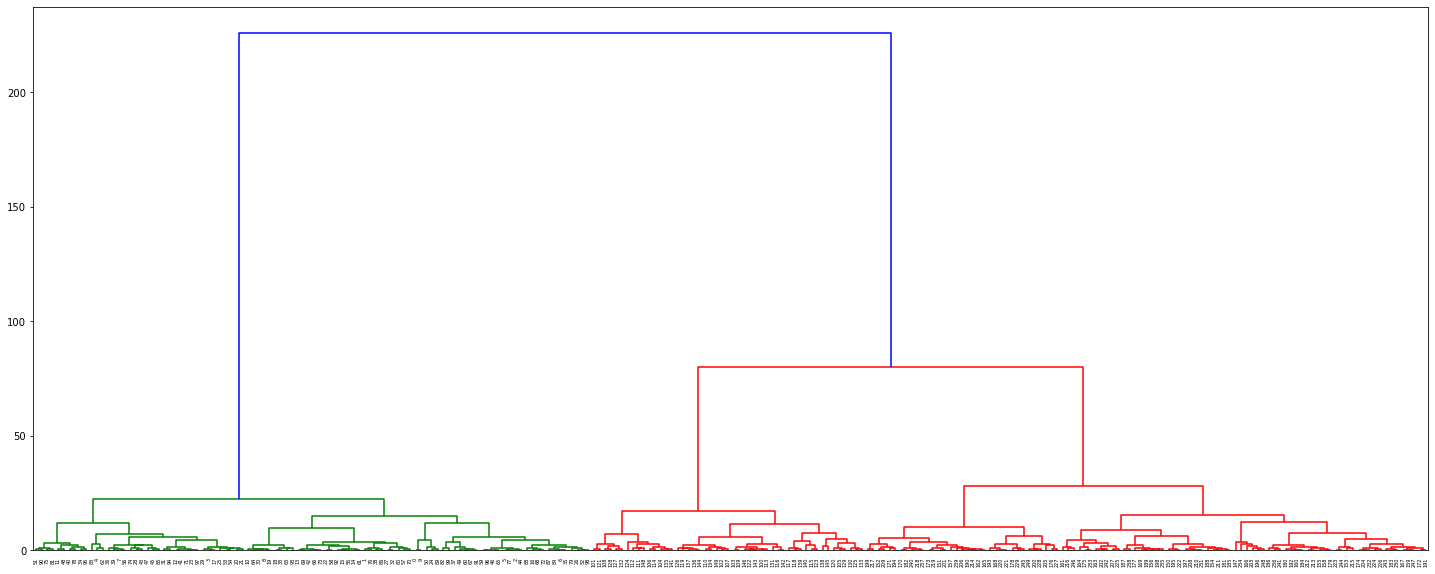

In [49]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

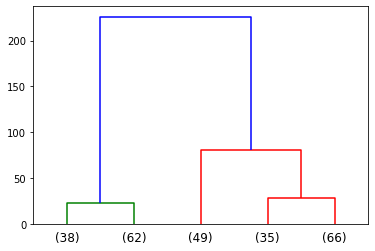

In [50]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()

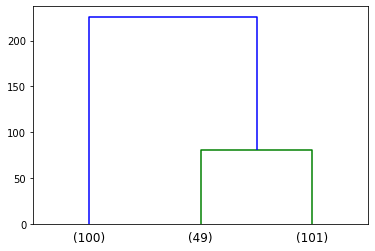

In [51]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

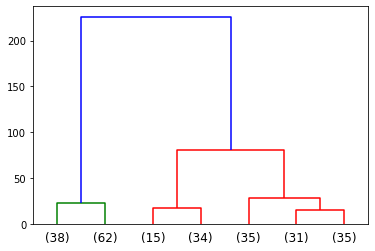

In [52]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=7,  # show only the last p merged clusters
)
plt.show()

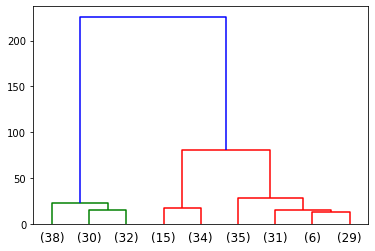

In [53]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=9,  # show only the last p merged clusters
)
plt.show()

In [54]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 20, criterion='distance')
clusters
clusters.shape

(250,)

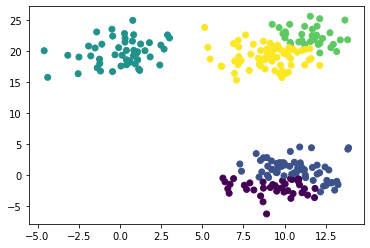

In [55]:
plt.scatter(X[:,0], X[:,1], c=clusters)  # plot points with cluster dependent colors
plt.show()

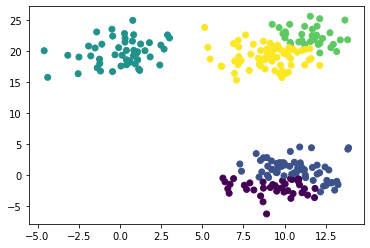

In [56]:
plt.scatter(X[:,0], X[:,1], c=clusters)  # plot points with cluster dependent colors
plt.show()

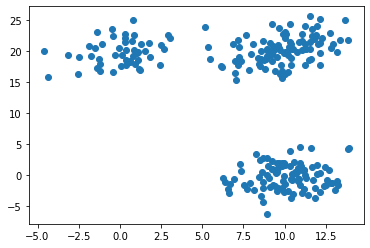

In [57]:
plt.scatter(X[:,0], X[:,1], cmap='red')  # plot points with cluster dependent colors
plt.show()

In [58]:
clusters

array([2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 5, 4, 4, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 4, 4, 5, 4, 5, 5,
       4, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5,
       5, 4, 4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5,
       5, 5, 5, 4, 5, 5, 5, 4], dtype=int32)